<a href="https://colab.research.google.com/github/yohanesnuwara/computational-geophysics/blob/master/seismic/seis_widget.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialize

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install segyio

     |████████████████████████████████| 92kB 4.1MB/s 


In [0]:
import segyio

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
!git clone https://github.com/yohanesnuwara/computational-geophysics

Cloning into 'computational-geophysics'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (225/225), done.
remote: Compressing objects: 100% (218/218), done.
remote: Total 225 (delta 114), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (225/225), 21.77 MiB | 12.06 MiB/s, done.
Resolving deltas: 100% (114/114), done.


In [0]:
import sys
sys.path.append('/content/computational-geophysics/seismic')

In [7]:
!git clone https://github.com/yohanesnuwara/d2geo

Cloning into 'd2geo'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 78 (delta 9), reused 0 (delta 0), pack-reused 52
Unpacking objects: 100% (78/78), done.


In [0]:
import sys
sys.path.append('/content/d2geo/attributes')

# Read Data 2D

In [0]:
filename = '/content/drive/My Drive/Public geoscience Data/Dutch F3 seismic data/Dutch Government_F3_entire_8bit seismic.segy'

In [10]:
import segyio

with segyio.open(filename) as f:
  print('Inline range from', min(f.ilines), 'to', max(f.ilines))
  print('Crossline range from', min(f.xlines), 'to', max(f.xlines)) 
  data = segyio.tools.cube(f)
  clip_percentile = 99
  vm = np.percentile(data, clip_percentile)

  inlines = f.ilines
  crosslines = f.xlines
  twt = f.samples

f'The {clip_percentile}th percentile is {vm:.0f}; the max amplitude is {data.max():.0f}'

Inline range from 100 to 750
Crossline range from 300 to 1250


'The 99th percentile is 6517; the max amplitude is 32767'

# Interactive 2D

In [0]:
from seis_util import *

In [12]:
help(slicing)

Help on function slicing in module seis_util:

slicing(cube, type, loc, a_line)
    Slicing a seismic cube to inline section, crossline section, or timeslice section
    
    Input:
    
    cube: 3d numpy array, data (output of segyio read)
    type: 'il' for inline slicing, 'xl' for xline slicing, 'ts' for time slicing
    loc: the location of inline, crossline, or timeslice depends on the type
         you're choosing (integer/float)
    a_line: array of inline, crossline, and timeslice locations, depends on the 
            type you're choosing (1D numpy array)



In [13]:
help(display_slice)

Help on function display_slice in module seis_util:

display_slice(slices, type, b_line, c_line, cmap, vmin, vmax)
    Display the slice
    
    Input:
    
    slices: the slice data, 2D numpy array
    type: 'il' for inline slicing, 'xl' for xline slicing, 'ts' for time slicing
    b_line, c_line: array of inline, crossline, and timeslice, depends on the 
                    type you're choosing (1D numpy array)
    * for 'il': b_line = crossline array, c_line = twt array
    * for 'xl': b_line = inline array, c_line = twt array
    * for 'ts': b_line = inline array, c_line = crossline array
    
    cmap: matplotlib pyplot colormaps ('gray', 'RdBu', 'seismic', 
          jet, Accent, ...)
    vmin, vmax: the minimum and maximum range for colormap. Many options:
    * None, None: normal and default plotting
    * specified vmin, vmax (e.g. vmin = 0, vmax = 1000)
    * vmin = -percentile99, vmax = +percentile99, percentiles of the cube



In [0]:
def seis_interact(cube=data, type='il', il_loc=400, xl_loc=1000, twt_loc=1404,
                  il_array=inlines, xl_array=crosslines, twt_array=twt, 
                  cmap='gray', vmin=-vm, vmax=vm):
  """
  Interactive seismic viewer
  """

  if type == 'il':
    a_line = il_array
    b_line = xl_array
    c_line = twt_array
    loc = il_loc

  if type == 'xl':
    a_line = xl_array
    b_line = il_array
    c_line = twt_array
    loc = xl_loc

  if type == 'ts':
    a_line = twt_array
    b_line = il_array
    c_line = xl_array
    loc = twt_loc

  slices = slicing(cube, type, loc, a_line)
  display_slice(slices, type, b_line, c_line, cmap, vmin, vmax)

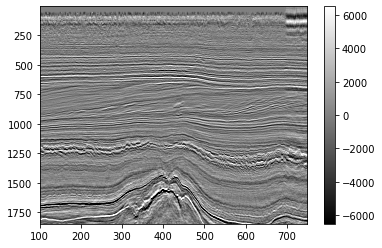

In [0]:
seis_interact(cube=data, type='xl', il_loc=401, xl_loc=800, twt_loc=1208, 
              il_array=inlines, xl_array=crosslines, twt_array=twt, 
              cmap='gray', vmin=-vm, vmax=vm)

In [0]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, ToggleButtons
import ipywidgets as widgets

In [55]:
cmap_button = ToggleButtons(description='cmap',options=['gray','seismic','RdBu','PuOr'])

@interact

def seis_widget(type='il', il_loc=(min(inlines), max(inlines)), 
                xl_loc=(min(crosslines), max(crosslines)), 
                twt_loc=(min(twt), max(twt), 4),
                cmap=cmap_button):
  """
  Interactive seismic viewer
  """

  if type == 'il':
    a_line = inlines
    b_line = crosslines
    c_line = twt
    loc = il_loc

  if type == 'xl':
    a_line = crosslines
    b_line = inlines
    c_line = twt
    loc = xl_loc

  if type == 'ts':
    a_line = twt
    b_line = inlines
    c_line = crosslines
    loc = twt_loc

  slices = slicing(data, type, loc, a_line)
  plt.figure(figsize=(15,7))
  display_slice(slices, type, b_line, c_line, cmap, -vm, vm)

interactive(children=(Text(value='il', description='type'), IntSlider(value=425, description='il_loc', max=750…

# Read 3D

Read and display information

In [81]:
import segyio

with segyio.open(filename) as f:

  data = segyio.tools.cube(f)
  inline_data = f.iline
  crossline_data = f.xline

  inlines = f.ilines
  crosslines = f.xlines
  twt = f.samples
  sample_rate = twt[1] - twt[0]
  print('Inline range from', inlines[0], 'to', inlines[-1])
  print('Crossline range from', crosslines[0], 'to', crosslines[-1])
  print('TWT from', twt[0], 'to', twt[-1])   
  print('Sample rate:', sample_rate, 'ms')

  clip_percentile = 99
  vm = np.percentile(data, clip_percentile)

f'The {clip_percentile}th percentile is {vm:.0f}; the max amplitude is {data.max():.0f}'

Inline range from 100 to 750
Crossline range from 300 to 1250
TWT from 4.0 to 1848.0
Sample rate: 4.0 ms


'The 99th percentile is 6517; the max amplitude is 32767'

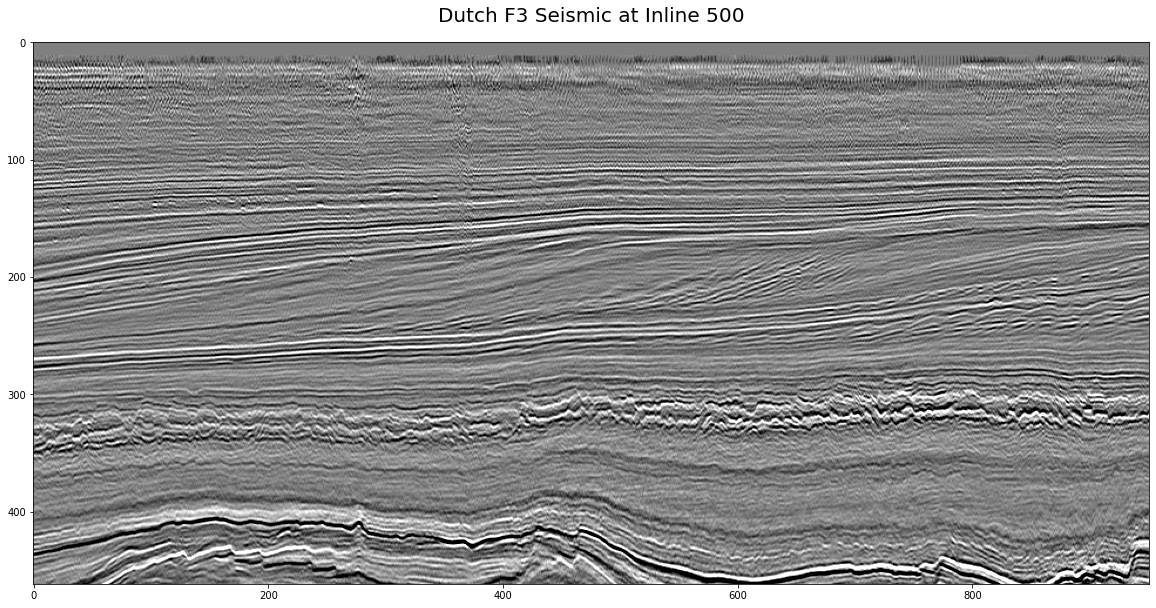

In [27]:
with segyio.open(filename) as f:
    inline_number = 500
    inline_slice = f.iline[inline_number]   
    plt.figure(figsize=(20, 10))
    plt.title('Dutch F3 Seismic at Inline {}'.format(inline_number), size=20, pad=20)
    plt.imshow(inline_slice.T, cmap="gray", vmin=-vm, vmax=vm) # other cmap = "RdBu"
    plt.show()

## Interactive 3D

In [82]:
"""
Interactive seismic viewer (example: Dutch F3 Data)

Input:

data, inlines, crosslines, twt, sample_rate, vm: output from segyio.read
data: the whole cube (3D numpy array)
inlines: inline locations (1D numpy array)
crosslines: crossline locations (1D numpy array)
twt: two-way travel time (1D numpy array)
sample_rate: sampling rate (float)
vm: 99th percentile of data

"""

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, ToggleButtons
import ipywidgets as widgets

type = ToggleButtons(description='Selection',options=['Inline','Crossline',
                                                      'Timeslice'])
cmap_button = ToggleButtons(description='Colormaps',options=['gray','seismic',
                                                             'RdBu','PuOr'])

@interact

def seis_widget(type=type, inline_loc=(min(inlines), max(inlines)), 
                xline_loc=(min(crosslines), max(crosslines)),
                timeslice_loc=(min(twt), max(twt), sample_rate), 
                cmap=cmap_button):

  if type == 'Inline':

    with segyio.open(filename) as f: 
        inline_slice = f.iline[inline_loc]  

        plt.figure(figsize=(20, 10))
        plt.title('Dutch F3 Seismic at Inline {}'.format(inline_loc))
        extent = [crosslines[0], crosslines[-1], twt[-1], twt[0]]

        p1 = plt.imshow(inline_slice.T, cmap=cmap, aspect='auto', extent=extent,
                        vmin=-vm, vmax=vm)

        plt.xlabel('Crossline'); plt.ylabel('TWT')
        plt.show()

  if type == 'Crossline':

    with segyio.open(filename) as f:
        xline_slice = f.xline[xline_loc]  

        plt.figure(figsize=(20, 10))
        plt.title('Dutch F3 Seismic at Crossline {}'.format(xline_loc))
        extent = [inlines[0], inlines[-1], twt[-1], twt[0]]

        p1 = plt.imshow(xline_slice.T, cmap=cmap, aspect='auto', extent=extent, 
                        vmin=-vm, vmax=vm)

        plt.xlabel('Inline'); plt.ylabel('TWT')
        plt.show()
  
  if type == 'Timeslice':

    id = np.where(twt == timeslice_loc)[0][0]
    tslice = data[:,:,id]

    plt.figure(figsize=(7,10))
    plt.title('Dutch F3 Seismic at Timeslice {} ms'.format(timeslice_loc))
    extent = [inlines[0], inlines[-1], crosslines[-1], crosslines[0]]

    p1 = plt.imshow(tslice.T, cmap=cmap, aspect='auto', extent=extent, 
                    vmin=-vm, vmax=vm)


    plt.xlabel('Inline'); plt.ylabel('Crossline')
    plt.gca().xaxis.set_ticks_position('top') # axis on top
    plt.gca().xaxis.set_label_position('top') # label on top
    plt.xlim(min(inlines), max(inlines))
    plt.ylim(min(crosslines), max(crosslines))
    plt.axis('equal')
    plt.show()   

interactive(children=(ToggleButtons(description='Selection', options=('Inline', 'Crossline', 'Timeslice'), val…

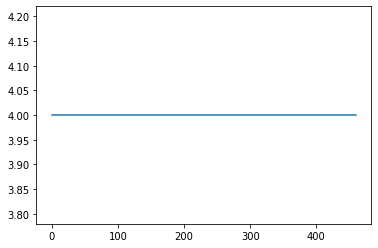

In [76]:
twts = [j-i for i,j in zip(twt[:-1], twt[1:])]
arr = np.arange(len(twts))

plt.plot(arr, twts)